# 程序说明
时间：2016年11月23日

说明：一个卷积自编码器的例程。

数据集：MNIST

原博客地址：[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)


![autoencoders](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

# 1.加载keras模块

In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# 2.Convolutional autoencoder

In [2]:
input_img = Input(shape=(28, 28, 1))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s - loss: 0.2372 - val_loss: 0.1694
Epoch 2/50
60000/60000 [==============================] - 7s - loss: 0.1588 - val_loss: 0.1502
Epoch 3/50
60000/60000 [==============================] - 7s - loss: 0.1441 - val_loss: 0.1346
Epoch 4/50
60000/60000 [==============================] - 7s - loss: 0.1353 - val_loss: 0.1313
Epoch 5/50
60000/60000 [==============================] - 7s - loss: 0.1293 - val_loss: 0.1266
Epoch 6/50
60000/60000 [==============================] - 7s - loss: 0.1252 - val_loss: 0.1229
Epoch 7/50
60000/60000 [==============================] - 7s - loss: 0.1222 - val_loss: 0.1193
Epoch 8/50
60000/60000 [==============================] - 7s - loss: 0.1202 - val_loss: 0.1179
Epoch 9/50
60000/60000 [==============================] - 7s - loss: 0.1184 - val_loss: 0.1185
Epoch 10/50
60000/60000 [==============================] - 7s - loss: 0.1169 - val_loss: 0.1166

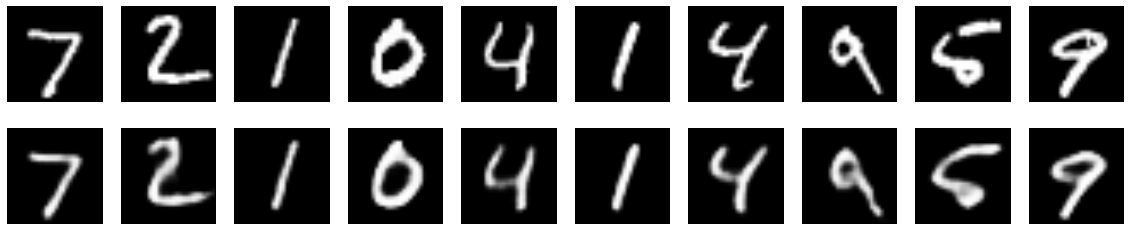

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 28, 28, 16)    160         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 14, 14, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 14, 8)     1160        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

## 中间编码层编码可视化

(10000, 4, 4, 8)


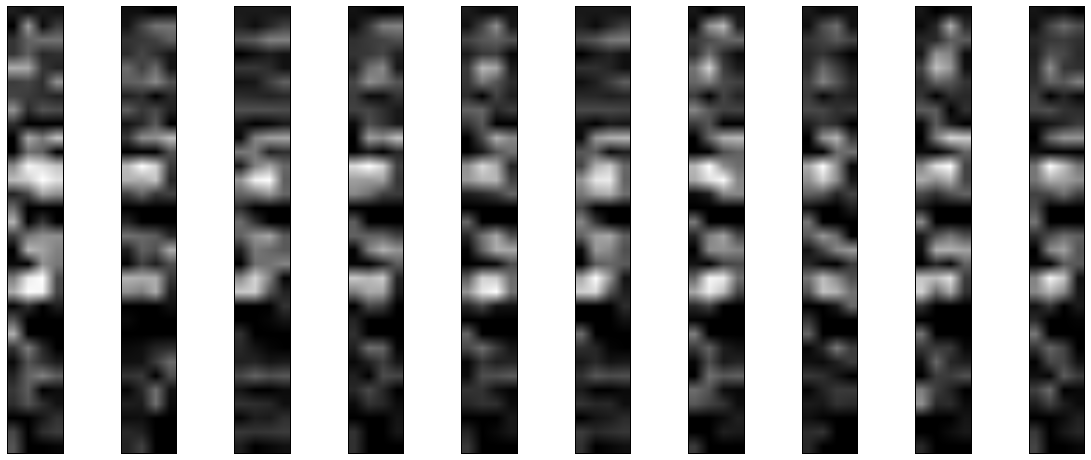

In [14]:
model_extractfeatures = Model(input=autoencoder.input, output=autoencoder.get_layer('maxpooling2d_3').output)
encoded_imgs = model_extractfeatures.predict(x_test)
print(encoded_imgs.shape)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()